# Car Price Prediction Model
# Mohan Dev Vashisht
# T-10
# 01315611622

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

                                # Data collection and processing 

In [54]:
car_dataset = pd.read_csv(r"C:\Users\LENOVO\Downloads\cars_2010_2020.csv")
car_dataset

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
0,Volkswagen,Jetta,2010,4.2,Petrol,54073.09
1,Honda,Pilot,2017,4.2,Hybrid,44924.91
2,Nissan,Murano,2011,4.2,Hybrid,76963.44
3,Toyota,RAV4,2010,2.4,Petrol,30871.25
4,Nissan,Altima,2010,3.6,Petrol,72037.65
...,...,...,...,...,...,...
9995,BMW,3 Series,2018,1.9,Hybrid,31676.02
9996,Hyundai,Sonata,2011,2.6,Diesel,67942.46
9997,Chevrolet,Impala,2011,1.3,Electric,64342.88
9998,BMW,X3,2020,1.4,Diesel,50060.30


In [56]:
car_dataset.head(5)

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
0,Volkswagen,Jetta,2010,4.2,Petrol,54073.09
1,Honda,Pilot,2017,4.2,Hybrid,44924.91
2,Nissan,Murano,2011,4.2,Hybrid,76963.44
3,Toyota,RAV4,2010,2.4,Petrol,30871.25
4,Nissan,Altima,2010,3.6,Petrol,72037.65


In [58]:
car_dataset.shape

(10000, 6)

In [60]:
#getting info about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             10000 non-null  object 
 1   Model            10000 non-null  object 
 2   Year             10000 non-null  int64  
 3   Engine Size (L)  10000 non-null  float64
 4   Fuel Type        10000 non-null  object 
 5   Price (USD)      10000 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 468.9+ KB


                                    # visualisation 

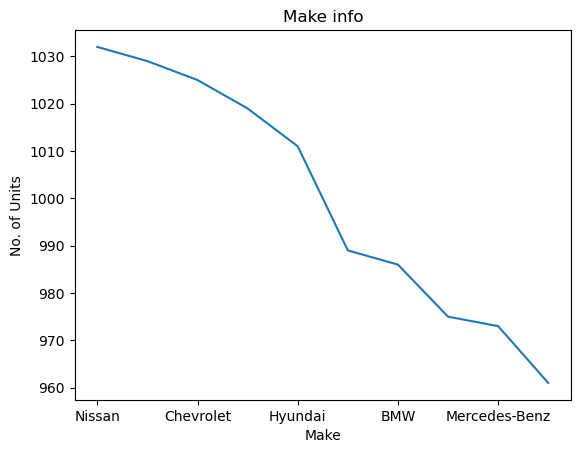

Make
Nissan           1032
Volkswagen       1029
Chevrolet        1025
Audi             1019
Hyundai          1011
Honda             989
BMW               986
Ford              975
Mercedes-Benz     973
Toyota            961
Name: count, dtype: int64

In [158]:
mk = car_dataset.Make.value_counts()
mk.plot()
plt.title('Make info')
plt.ylabel('No. of Units')
plt.show()
mk

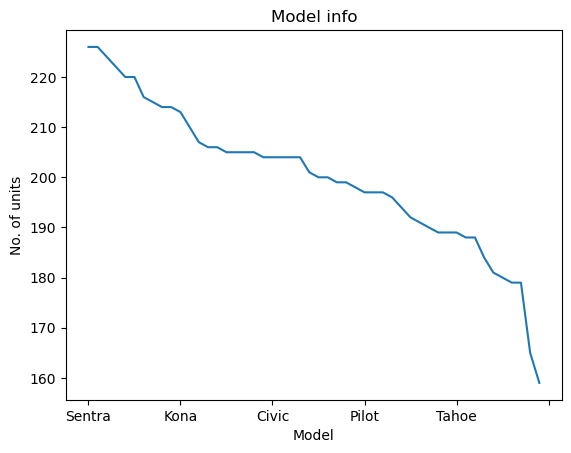

Model
Sentra        226
Spark         226
Golf          224
Malibu        222
5 Series      220
Tiguan        220
Jetta         216
Q7            215
E-Class       214
Murano        214
Kona          213
Rogue         210
Fiesta        207
Fit           206
Q5            206
Sonata        205
3 Series      205
C-Class       205
Focus         205
Atlas         204
Civic         204
Highlander    204
A6            204
F-150         204
X3            201
Camry         200
Mustang       200
Equinox       199
Santa Fe      199
A4            198
Pilot         197
Elantra       197
Tucson        197
A3            196
Versa         194
Accord        192
GLC           191
CR-V          190
Prius         189
Impala        189
Tahoe         189
Altima        188
RAV4          188
GLA           184
X5            181
Corolla       180
7 Series      179
S-Class       179
Passat        165
Explorer      159
Name: count, dtype: int64

In [156]:
mk = car_dataset.Model.value_counts()
mk.plot()
plt.title('Model info')
plt.ylabel('No. of units')
plt.show()
mk

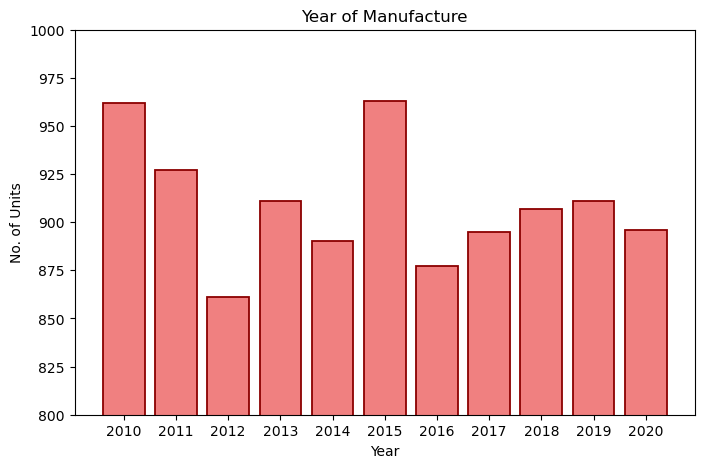

In [154]:
yr = car_dataset.Year.value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(yr.index , yr.values ,
       color = ["lightcoral"],
        edgecolor = 'darkred',
        linewidth = 1.3
       )
plt.title('Year of Manufacture')
plt.ylabel('No. of Units')
plt.xlabel('Year')
plt.ylim(800,1000)
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.show()

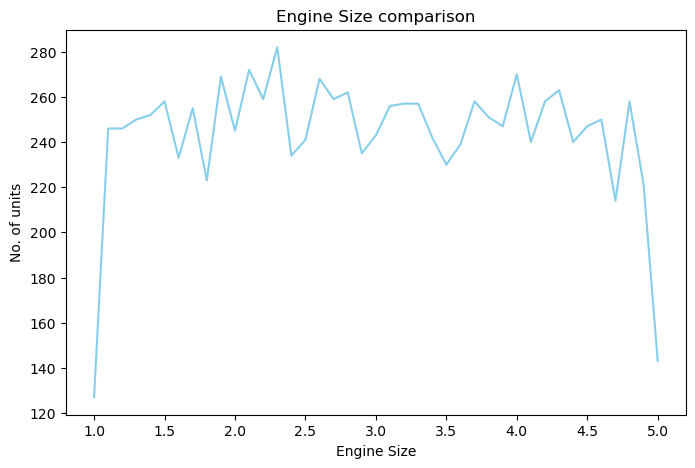

In [162]:
yr = car_dataset['Engine Size (L)'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.title('Engine Size comparison')
plt.ylabel('No. of units')
plt.xlabel('Engine Size')
plt.plot(yr.index , yr.values ,
       color = 'skyblue'
       )

(2400.0, 2600.0)

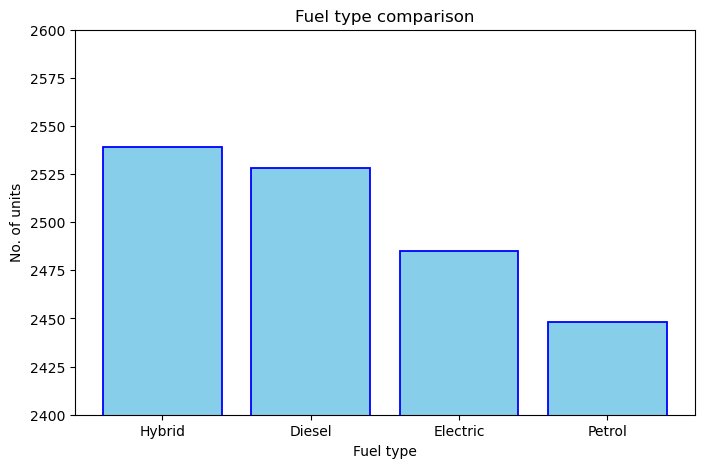

In [164]:
cr = car_dataset['Fuel Type'].value_counts()
plt.figure(figsize=(8,5))
plt.title('Fuel type comparison')
plt.ylabel('No. of units')
plt.xlabel('Fuel type')
plt.bar(cr.index , cr.values ,
       color = 'skyblue',
        edgecolor = 'blue',
        linewidth = 1.3
       )
plt.ylim(2400,2600)

                                    # checking missing values

In [14]:
car_dataset.isnull().sum()

Make               0
Model              0
Year               0
Engine Size (L)    0
Fuel Type          0
Price (USD)        0
dtype: int64

                    #checking distribution of categorical data

In [16]:
car_dataset

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
0,Volkswagen,Jetta,2010,4.2,Petrol,54073.09
1,Honda,Pilot,2017,4.2,Hybrid,44924.91
2,Nissan,Murano,2011,4.2,Hybrid,76963.44
3,Toyota,RAV4,2010,2.4,Petrol,30871.25
4,Nissan,Altima,2010,3.6,Petrol,72037.65
...,...,...,...,...,...,...
9995,BMW,3 Series,2018,1.9,Hybrid,31676.02
9996,Hyundai,Sonata,2011,2.6,Diesel,67942.46
9997,Chevrolet,Impala,2011,1.3,Electric,64342.88
9998,BMW,X3,2020,1.4,Diesel,50060.30


In [17]:
print(car_dataset['Model'].value_counts())

Model
Sentra        226
Spark         226
Golf          224
Malibu        222
5 Series      220
Tiguan        220
Jetta         216
Q7            215
E-Class       214
Murano        214
Kona          213
Rogue         210
Fiesta        207
Fit           206
Q5            206
Sonata        205
3 Series      205
C-Class       205
Focus         205
Atlas         204
Civic         204
Highlander    204
A6            204
F-150         204
X3            201
Camry         200
Mustang       200
Equinox       199
Santa Fe      199
A4            198
Pilot         197
Elantra       197
Tucson        197
A3            196
Versa         194
Accord        192
GLC           191
CR-V          190
Prius         189
Impala        189
Tahoe         189
Altima        188
RAV4          188
GLA           184
X5            181
Corolla       180
7 Series      179
S-Class       179
Passat        165
Explorer      159
Name: count, dtype: int64


                                # encoding the categorical data

In [19]:
car_dataset.replace({'Make': {'Nissan':0,'Volkswagen':1,'Chevrolet':2,'Audi':3,'Hyundai':4,'Honda':5,
                             'BMW': 6,'Ford':7,'Mercedes-Benz':8,'Toyota':9}},inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20308\3305088509.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Make': {'Nissan':0,'Volkswagen':1,'Chevrolet':2,'Audi':3,'Hyundai':4,'Honda':5,


In [20]:
y = car_dataset['Model'].values
y

array(['Jetta', 'Pilot', 'Murano', ..., 'Impala', 'X3', 'Equinox'],
      dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
y

array([27, 33, 30, ..., 26, 48, 16])

In [23]:
car_dataset

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
0,1,Jetta,2010,4.2,Petrol,54073.09
1,5,Pilot,2017,4.2,Hybrid,44924.91
2,0,Murano,2011,4.2,Hybrid,76963.44
3,9,RAV4,2010,2.4,Petrol,30871.25
4,0,Altima,2010,3.6,Petrol,72037.65
...,...,...,...,...,...,...
9995,6,3 Series,2018,1.9,Hybrid,31676.02
9996,4,Sonata,2011,2.6,Diesel,67942.46
9997,2,Impala,2011,1.3,Electric,64342.88
9998,6,X3,2020,1.4,Diesel,50060.30


In [24]:
car_dataset["Model"] = y

In [25]:
z = car_dataset['Fuel Type'].values
z

array(['Petrol', 'Hybrid', 'Hybrid', ..., 'Electric', 'Diesel',
       'Electric'], dtype=object)

In [26]:
le = LabelEncoder()
z = le.fit_transform(z)
z

array([3, 2, 2, ..., 1, 0, 1])

In [27]:
car_dataset["Fuel Type"] = z
car_dataset

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
0,1,27,2010,4.2,3,54073.09
1,5,33,2017,4.2,2,44924.91
2,0,30,2011,4.2,2,76963.44
3,9,37,2010,2.4,3,30871.25
4,0,7,2010,3.6,3,72037.65
...,...,...,...,...,...,...
9995,6,0,2018,1.9,2,31676.02
9996,4,42,2011,2.6,0,67942.46
9997,2,26,2011,1.3,1,64342.88
9998,6,48,2020,1.4,0,50060.30


In [28]:
X = car_dataset.drop(["Price (USD)"],axis = 1)
Y = car_dataset["Price (USD)"]
X

,Make,Model,Year,Engine Size (L),Fuel Type
0,1,27,2010,4.2,3
1,5,33,2017,4.2,2
2,0,30,2011,4.2,2
3,9,37,2010,2.4,3
4,0,7,2010,3.6,3
...,...,...,...,...,...
9995,6,0,2018,1.9,2
9996,4,42,2011,2.6,0
9997,2,26,2011,1.3,1
9998,6,48,2020,1.4,0


In [29]:
Y

0       54073.09
1       44924.91
2       76963.44
3       30871.25
4       72037.65
          ...   
9995    31676.02
9996    67942.46
9997    64342.88
9998    50060.30
9999    53418.84
Name: Price (USD), Length: 10000, dtype: float64

                # splitting dataset into training and testing data

In [171]:
 X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.2, random_state =1)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

                                        # model training 

In [33]:
lin_reg_model =LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

                                        # model evaluation

In [35]:
training_data_prediction = lin_reg_model.predict(X_train)

In [36]:
# R square error
error_score = metrics.r2_score(Y_train, training_data_prediction) 
print(" R sqaure error score: " , error_score)

 R sqaure error score:  0.0012114004965594338


In [37]:
from sklearn.metrics import mean_squared_error

Y_pred = lin_reg_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 344137528.6033962


In [38]:
lin_reg_model.score(X_test, Y_test)


0.0003067525447315589